<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/nifty100_Above_50EMA_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import warnings
warnings.filterwarnings('ignore')

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, YearLocator
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
from pandas_datareader import data as pdr
START = "2015-01-01"  #yyyy-mm-dd
#END = end_date
lst= []

In [93]:
data = pd.read_csv('https://raw.githubusercontent.com/anirbanghoshsbi/data/main/STOCKS100.txt', sep='\t')
nifty100 = data['yahoo finance ticker'].tolist()
nifty =yf.download('^NSEI', start=START)
nifty['pct_chg']=nifty['Close'].pct_change(90)*100

[*********************100%***********************]  1 of 1 completed


# Download From Quandl

In [94]:
import seaborn as sns

In [95]:
#@title #####download
for i in range(len(nifty100)):
  dfi = yf.download(nifty100[i], start=START)
  
  dfi = dfi.dropna()
 
  lst.append(dfi)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- INFRATEL-EQ.

In [96]:
n100_database=lst.copy()

In [97]:
#@title #####draw plot code
def draw_plot(labels,df,nifty):
  
  buy,sell,buy20,sell20=plot_buy_sell_signal(df)
  fig, ax = plt.subplots(4,1, figsize=(15,9),sharex=True)
  ax[0].plot(df.loc[:, :].index, df.loc[:, 'sum'], label=labels)
  ax[2].plot(nifty.loc[:, :].index, nifty.loc[:, 'Close'], label='Nifty')
  #ax[2].scatter(nifty.iloc[buy].index,nifty.iloc[buy].Close,marker='^',label='Buy',color='g')
  #ax[2].scatter(nifty.iloc[sell].index,nifty.iloc[sell].Close,marker='v',label='Sell',color='r')
  ax[2].plot(nifty['Close'].ewm(span=50,adjust=False).mean())
  ax[0].plot(df['sum'].ewm(span=50, adjust=False).mean(),linewidth=2, markersize=4 ,label='50EMA' ,color='r')
  ax[0].plot(df['sum'].ewm(span=20, adjust=False).mean(),linewidth=1, markersize=4 ,label='20EMA' ,color='g')
  ax[1].plot(df['macd'],label='MACD100')
  ax[1].plot(df['signal'],label='Signal100')
  ax[3].plot(df['macd20'],label='MACD50')
  ax[3].plot(df['signal20'],label='Signal50')
  #ax[2].scatter(nifty.iloc[buy20].index,nifty.iloc[buy20].Close,marker='*',label='Buy',color='g')
  #ax[2].scatter(nifty.iloc[sell20].index,nifty.iloc[sell20].Close,marker='*',label='Sell',color='r')
  #ax[1].hist(df['hist'],label='Histogram')
  ax[0].legend(loc='upper left')
  ax[0].set_ylabel(labels)
  ax[1].legend('MACD')
  ax[1].legend(loc='best')
  ax[2].legend('Nifty')
  ax[0].axhline(y=50 , color ='r')
  #ax[0].axhline(y=80 , color ='c')
  #ax[0].axhline(y=40 , color ='b')
  #ax[0].axhline(y=20 , color ='g')
  ax[1].axhline(y=0 , color='r')
  fig.suptitle(labels)
  plt.show()

In [98]:
#@title #####get indicators code
def get_indicators(ema,lst=lst):
  dlix=[]
  for i in range(len(lst)):
    dlix.append(lst[i].Close)

  df = pd.DataFrame(dlix).T
  namelist =[]
  for i in range(1,len(lst)+1):
    namelist.append('Close'+str(i))
  df.columns = namelist

  for name in namelist:
    name=str(name)
    var = name+'ema_'+str(ema)
    
    df[var] = df[name].ewm(span=ema, adjust=False).mean()
  lst_N = []
  for name in namelist:
    name=str(name)
    varname = name+'ema_'+str(ema)
  
    lst_N.append((df[varname].diff() > 0 ).astype(int))
  df2 = pd.DataFrame(lst_N).T
  df2['sum']=df2.sum(axis=1)
  df2['macd']=df2['sum'].ewm(span=50, adjust=False).mean()-df2['sum'].ewm(span=100, adjust=False).mean()
  df2['signal']=df2['macd'].ewm(span=35,adjust=False).mean()
  df2['hist']=df2['macd']-df2['signal']
  df2['macd20']=df2['sum'].ewm(span=20, adjust=False).mean()-df2['sum'].ewm(span=50, adjust=False).mean()
  df2['signal20']=df2['macd20'].ewm(span=15,adjust=False).mean()
  df2['hist20']=df2['macd20']-df2['signal20']
  return df2

In [99]:
#@title ######get buy sell signals
def plot_buy_sell_signal(df):
  buy=[]
  sell=[]
  buy20=[]
  sell20=[]
  for i in range(len(df)):
   
    if df.macd.iloc[i]>df.signal.iloc[i] and df.macd.iloc[i-1]<df.signal.iloc[i-1] :
      buy.append(i)
    elif df.macd.iloc[i]<df.signal.iloc[i] and df.macd.iloc[i-1]>df.signal.iloc[i-1]:
      sell.append(i)
    if df.macd20.iloc[i]>df.signal20.iloc[i] and df.macd20.iloc[i-1]<df.signal20.iloc[i-1] :
      buy20.append(i)
    elif df.macd20.iloc[i]<df.signal20.iloc[i] and df.macd20.iloc[i-1]>df.signal20.iloc[i-1]:
      sell20.append(i)
  return buy ,sell , buy20,sell20

In [100]:
#@title #####start time
import datetime
start_date = '2016-01-01'
end_date = str(datetime.datetime.today()).split()[0]
#datetime.date.today()
end_date

'2021-09-08'

#nifty 100 above 20 dma

In [101]:
df=get_indicators(20)  #50,20,15

In [102]:
 buy,sell,buy20,sell20=plot_buy_sell_signal(df)

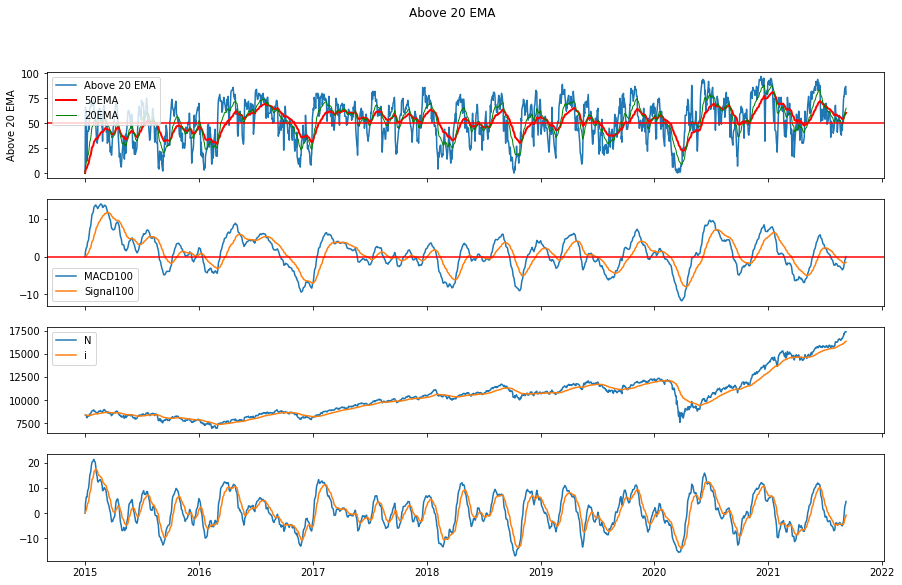

In [103]:
draw_plot('Above 20 EMA',df,nifty)


#nifty 100 above 50 dma

In [104]:
df=get_indicators(50)  #50,20,15

In [105]:
 buy,sell,buy20,sell20=plot_buy_sell_signal(df)

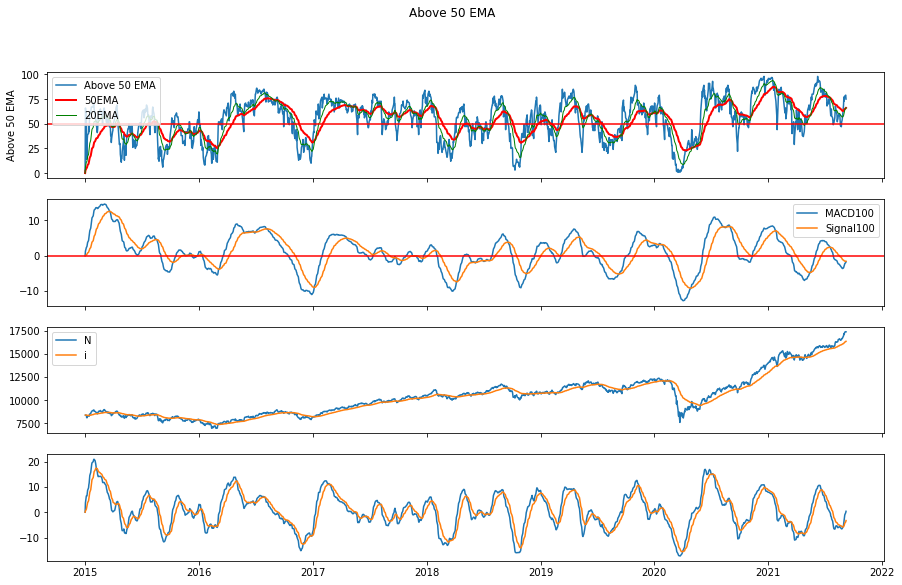

In [106]:
draw_plot('Above 50 EMA',df,nifty)

#nifty 100 above 200 dma

In [107]:
textstr='Buy Signal Below 0 line of MACD invariably Works'

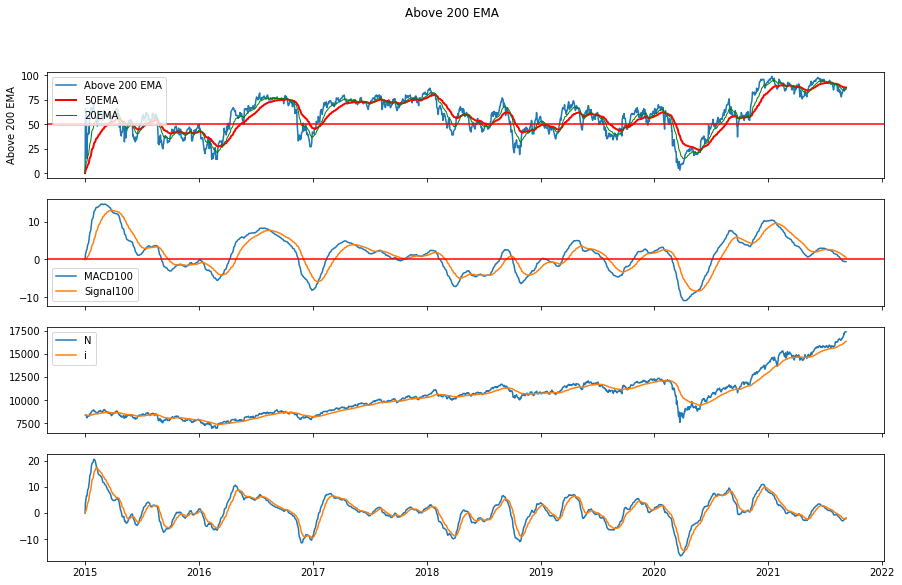

In [108]:
df=get_indicators(200)
buy,sell,buy20,sell20=plot_buy_sell_signal(df)
draw_plot('Above 200 EMA',df,nifty)


In [109]:

sample= nifty.join(df , how='inner',rsuffix='right')

In [110]:
sample['sum_diff']=sample['sum'].diff(90)


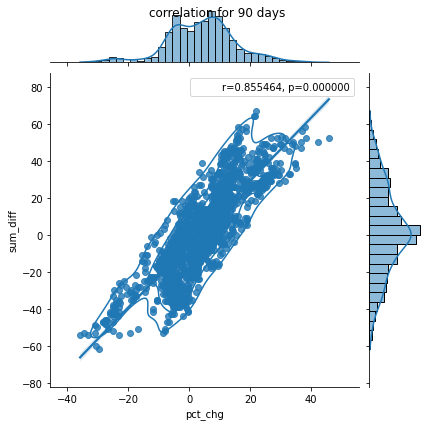

In [111]:
from scipy.stats import pearsonr
g=sns.jointplot(x='pct_chg',y='sum_diff',data=sample,kind='reg').plot_joint(sns.kdeplot,n_levels=6)
r, p = pearsonr(sample['pct_chg'][-800:], sample['macd'][-800:])
phantom, = g.ax_joint.plot([], [], linestyle="", alpha=0)
g.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])
plt.suptitle('correlation for 90 days')
plt.show()

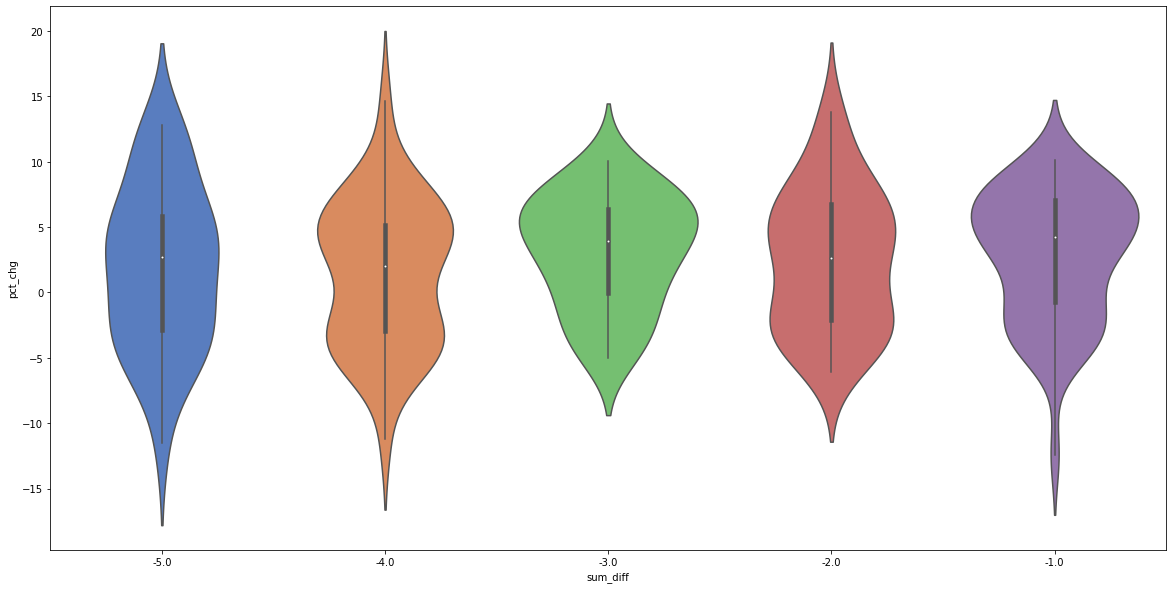

In [112]:
plt.figure(figsize=(20,10))
sns.violinplot(x='sum_diff',y='pct_chg',data=sample[(sample['sum_diff'] >= -5) & (sample['sum_diff'] <= -1)], palette="muted") # 
plt.show()

# New High New Low For Nifty100

In [113]:

def get_NHNL_indicators(lst=lst,high='high'):
  print(f'New high get close:')
  dlix=[]
  for i in range(len(lst)):
    
    dlix.append(lst[i].Close)

  df = pd.DataFrame(dlix).T
  #print(f'final appended df shape: {df.shape}')
  #print(f'final appended df columns: {df.columns}')
  namelist =[]
  for i in range(1,len(lst)+1):
    namelist.append('Close'+str(i))
  df.columns = namelist
  #print(f'final appended df columns after renaming: {df.columns}')
  for name in namelist:
    name=str(name)
    
    var = name+'NH'
    var1= name+'NL'
    if high=='high':
      df[var] = df[name].rolling(window =20).max()
      
    if high=='low':
      df[var1] = df[name].rolling(window =20).min()  
  #print(f'final  df columns after getting new high: {df.tail(10)}')

  
  return df

In [114]:
def high_indicator(high,lst=lst):
  print(f'High Indiator Calc:')
  d=get_NHNL_indicators(lst=lst,high='high')
  #print(d.shape)
  len(d.iloc[0])//2
  cls=[]
  nhnl=[]
  for i in range(1,len(d.iloc[0])//2+1):
    var='Close'+str(i)
    cls.append(var)
    var_nhnl='Close'+str(i)+'NH'
    nhnl.append(var_nhnl)
    d=d.fillna(0)
   
  wantedcol=[]
  for i,j in zip(cls,nhnl):
    variable=str(i)+'newhigh'
    wantedcol.append(variable)
    #print(f'***********Close : {d[i]} , ********New High : {d[j]} , ************diff d[j]-d[i] : {d[i]-d[j]}')
    d[variable]=d[j]-d[i]
  x=d[wantedcol] 
  x[x > 0] = -1 
  x[x==0]=1
  x[x==-1]=0
  output = x.sum(axis=1)
  output=pd.DataFrame(output)
  output.columns=['NH']
  return output

In [115]:
def low_indicator(high,lst=lst):
  d=get_NHNL_indicators(lst=lst,high='low')
  len(d.iloc[0])//2
  cls=[]
  nhnl=[]
  for i in range(1,len(d.iloc[0])//2+1):
    var='Close'+str(i)
    cls.append(var)
    var_nhnl='Close'+str(i)+'NL'
    nhnl.append(var_nhnl)
    d=d.fillna(0)

  wantedcol=[]
  for i,j in zip(cls,nhnl):
    variable=str(i)+'newlow'
    wantedcol.append(variable)
    #print(f'***********Close : {d[i]} , ********New low : {d[j]} , ************diff d[j]-d[i] : {d[i]-d[j]}')
    d[variable]=d[i]-d[j]
  x=d[wantedcol]
  #print(x.tail(10)) 
  x[x > 0] = -1 
  x[x==0]=1
  x[x==-1]=0
  
  output = x.sum(axis=1)
  output=pd.DataFrame(output)
  output.columns=['NL']
  return output

In [116]:
high='high'
output=high_indicator(high,n100_database) #lix_database

High Indiator Calc:
New high get close:


In [117]:
high='low'
downput=low_indicator(high,n100_database)

New high get close:


In [118]:
output['NH']=np.where(output.NH<0,0,output.NH)

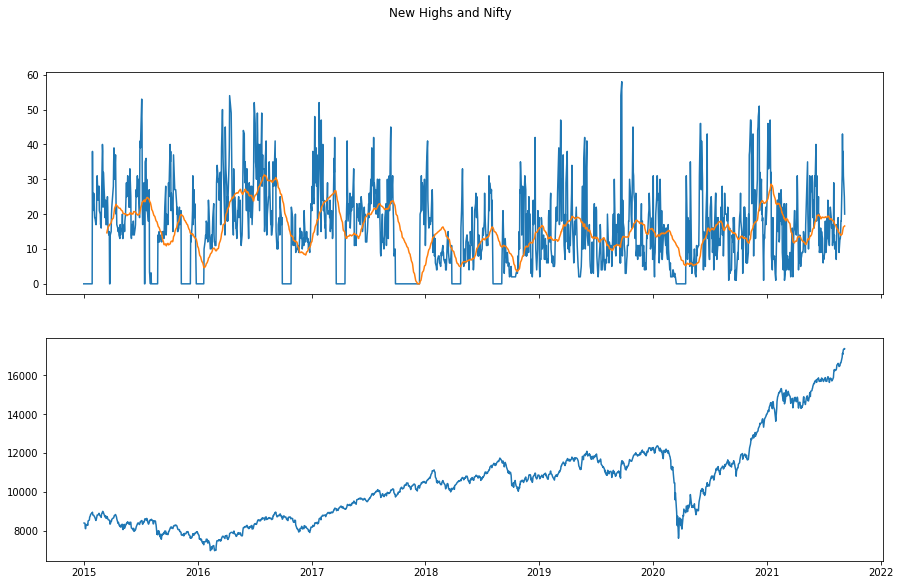

In [119]:
fig, ax = plt.subplots(2,1, figsize=(15,9),sharex=True)
ax[0].plot(output.loc[:, :].index, output.loc[:, 'NH'], label='NH')
ax[0].plot(output.loc[:, :].index, output.loc[:, 'NH'].rolling(window=50).mean(), label='NHmoving avg')

ax[1].plot(nifty.iloc[:, :].index, nifty.loc[:, 'Close'], label='Nifty')
plt.suptitle('New Highs and Nifty')
plt.show()

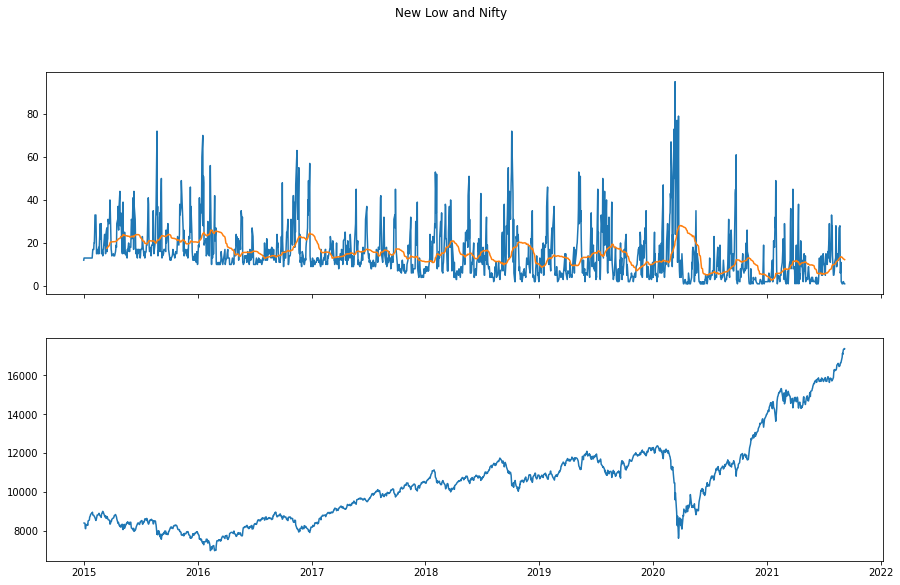

In [120]:
fig, ax = plt.subplots(2,1, figsize=(15,9),sharex=True)
ax[0].plot(downput.loc[:, :].index, downput.loc[:, 'NL'], label='NL')
ax[0].plot(downput.loc[:, :].index, downput.loc[:, 'NL'].rolling(window=50).mean(), label='NLmoving avg')
ax[1].plot(nifty.iloc[:, :].index, nifty.loc[:, 'Close'], label='Nifty')
plt.suptitle('New Low and Nifty')
plt.show()

In [121]:
def plot_me_buy_sell_signal(output,downput):
  reg1=[]
  reg2=[]
  for i in range(len(df)):
    if output.loc[:, 'NH'].rolling(window=50).mean().iloc[i]>downput.loc[:, 'NL'].rolling(window=50).mean().iloc[i] and \
    output.loc[:, 'NH'].rolling(window=50).mean().iloc[i-1]<downput.loc[:, 'NL'].rolling(window=50).mean().iloc[i-1]:
      reg1.append(i)
    elif output.loc[:, 'NH'].rolling(window=50).mean().iloc[i]<downput.loc[:, 'NL'].rolling(window=50).mean().iloc[i] and \
    output.loc[:, 'NH'].rolling(window=50).mean().iloc[i-1]>downput.loc[:, 'NL'].rolling(window=50).mean().iloc[i-1]:
      reg2.append(i)
  
  return reg1,reg2

In [122]:
buy,sell=plot_me_buy_sell_signal(output,downput)

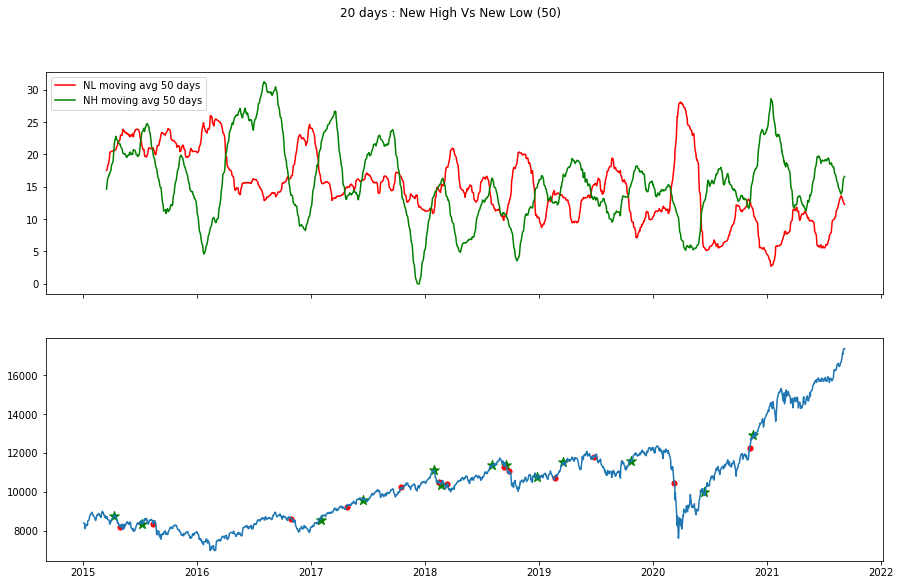

In [123]:
fig, ax = plt.subplots(2,1, figsize=(15,9),sharex=True)
ax[0].plot(downput.loc[:, :].index, downput.loc[:, 'NL'].rolling(window=50).mean(),'r', label='NL moving avg 50 days')
ax[0].plot(output.loc[:, :].index, output.loc[:, 'NH'].rolling(window=50).mean(),'g', label='NH moving avg 50 days')
ax[1].plot(nifty.iloc[:, :].index, nifty.loc[:, 'Close'], label='Nifty')
plt.scatter(nifty.iloc[buy][:].index,nifty.iloc[buy][:].Close,marker='*',s=105,color='g',label='Buy')
plt.scatter(nifty.iloc[sell][:].index,nifty.iloc[sell][:].Close,marker='.',s=105,color='r',label='Sell')
plt.suptitle('20 days : New High Vs New Low (50)')
ax[0].legend()
plt.show()

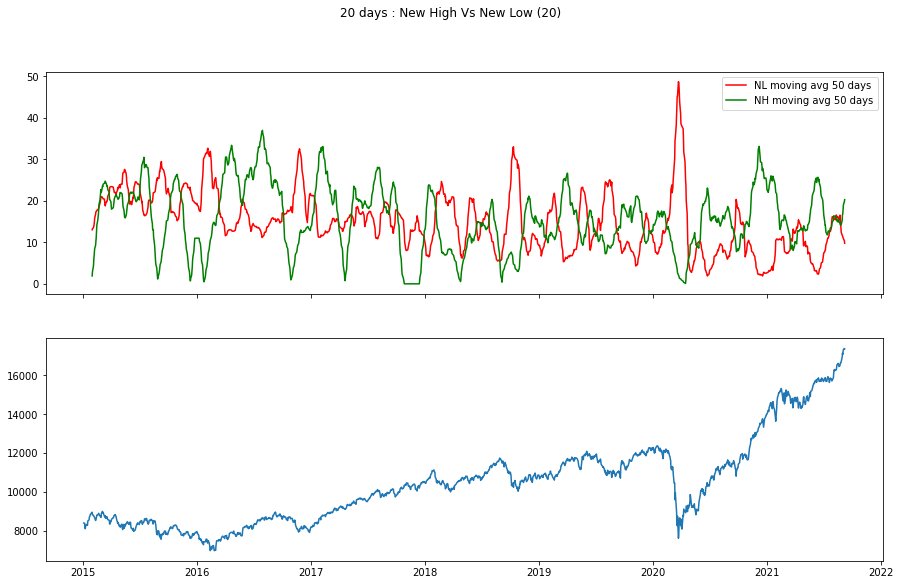

In [124]:
fig, ax = plt.subplots(2,1, figsize=(15,9),sharex=True)
ax[0].plot(downput.loc[:, :].index, downput.loc[:, 'NL'].rolling(window=20).mean(),'r', label='NL moving avg 50 days')
ax[0].plot(output.loc[:, :].index, output.loc[:, 'NH'].rolling(window=20).mean(),'g', label='NH moving avg 50 days')
ax[1].plot(nifty.iloc[:, :].index, nifty.loc[:, 'Close'], label='Nifty')
plt.suptitle('20 days : New High Vs New Low (20)')
ax[0].legend()
plt.show()

In [125]:
downput['avg']= downput.loc[:, 'NL'].rolling(window=50).mean()
output['avg'] = output.loc[:, 'NH'].rolling(window=50).mean()
output['final']=output['avg']-downput['avg']

# New High New Low Plot (Essential)

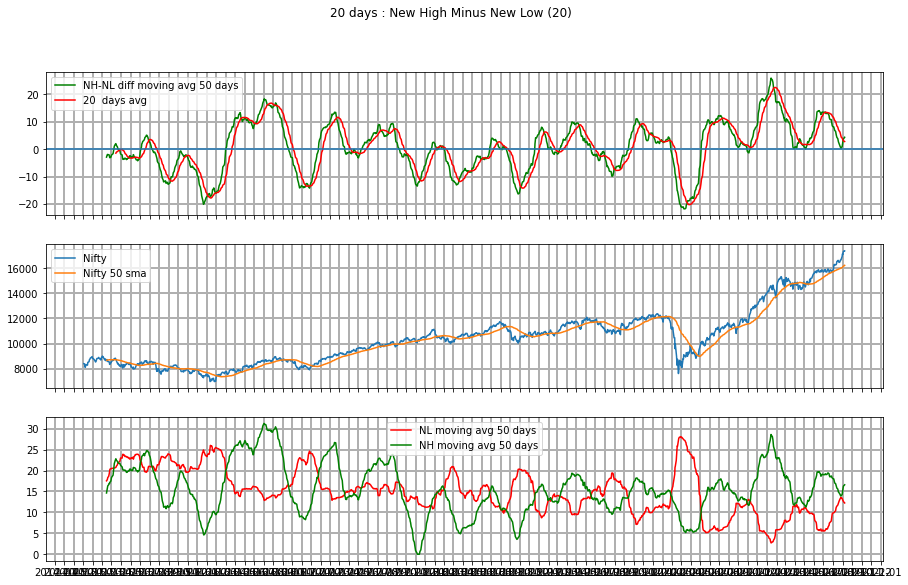

In [126]:
fig, ax = plt.subplots(3,1, figsize=(15,9),sharex=True)
ax[2].plot(downput.loc[:, :].index, downput.loc[:, 'NL'].rolling(window=50).mean(),'r', label='NL moving avg 50 days')
ax[2].plot(output.loc[:, :].index, output.loc[:, 'NH'].rolling(window=50).mean(),'g', label='NH moving avg 50 days')
ax[0].plot(output.loc[:, :].index, output.loc[:, 'final'],'g', label='NH-NL diff moving avg 50 days')
ax[0].plot(output.loc[:, :].index, output.loc[:, 'final'].rolling(window=20).mean(),'r', label='20  days avg')
ax[1].plot(nifty.iloc[:, :].index, nifty.loc[:, 'Close'], label='Nifty')
ax[1].plot(nifty.iloc[:, :].index, nifty.loc[:, 'Close'].rolling(window=50).mean(), label='Nifty 50 sma')
plt.suptitle('20 days : New High Minus New Low (20)')
yloc = YearLocator()
mloc = MonthLocator()
ax[0].xaxis.set_major_locator(mloc)
ax[1].xaxis.set_major_locator(mloc)
ax[2].xaxis.set_major_locator(mloc)
ax[0].grid(linewidth =2)
ax[1].grid(linewidth =2)
ax[2].grid(linewidth =2)
ax[0].legend()
ax[2].legend()
ax[1].legend()
ax[0].axhline(y=0)
plt.show()

# LIX 15 STRENGTH

In [127]:
lix15 =['ADANIPORTS.NS','AXISBANK.NS','BAJFINANCE.NS','BHARTIARTL.NS','HDFCBANK.NS','INDUSINDBK.NS','IOC.NS','MARUTI.NS','ONGC.NS','POWERGRID.NS','RELIANCE.NS','SBIN.NS','SUNPHARMA.NS','TATASTEEL.NS','ULTRACEMCO.NS',]

lix=[]
for i in range(15):
  lxi = yf.download(lix15[i], start=START)
  
  lxi = lxi.dropna()
  
  lix.append(lxi)



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

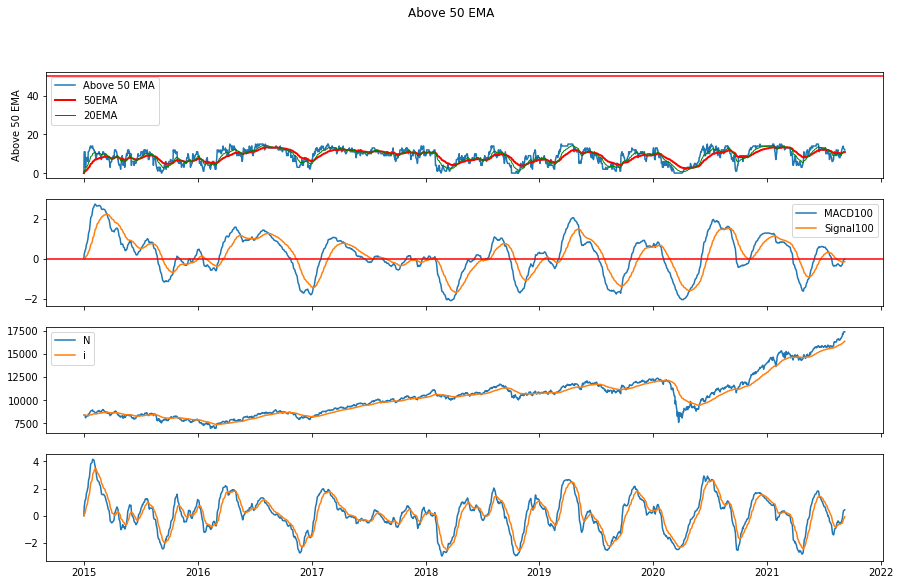

In [128]:
df=get_indicators(50,lix)
buy,sell,buy20,sell20=plot_buy_sell_signal(df)
draw_plot('Above 50 EMA',df,nifty)

In [129]:
df1=get_indicators(20)

In [130]:
df2=get_indicators(50)

In [131]:
df3=get_indicators(200)

In [132]:
combined = pd.concat([df1['sum'],df2['sum'],df3['sum']],axis=1)

In [133]:
combined.columns =['ema20','ema50','ema200']

In [134]:
combined['total']=combined['ema20']*1+combined['ema50']*2+combined['ema200']*3

In [135]:
import pandas as pd
from sklearn import preprocessing

x = combined.total.values.reshape(-1,1) #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

In [136]:
df_f=pd.concat([combined.reset_index().Date,df*100],axis=1)

In [137]:
df_f.set_index('Date',inplace=True)
df_f.columns=['sum']

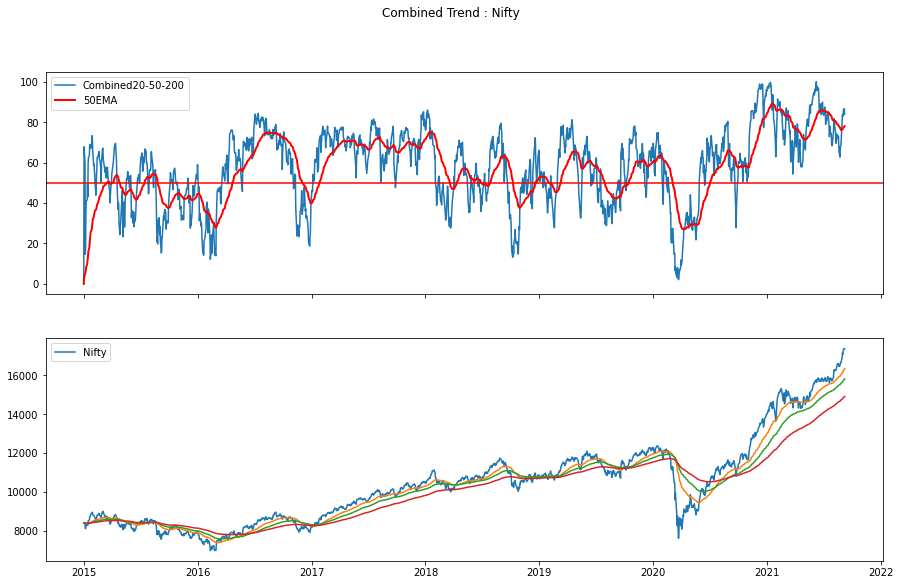

In [138]:
fig, ax = plt.subplots(2,1, figsize=(15,9),sharex=True)
ax[0].plot(df_f.loc[:, :].index, df_f.loc[:, 'sum'],label='Combined20-50-200')
ax[1].plot(nifty.loc[:, :].index, nifty.loc[:, 'Close'], label='Nifty')
ax[0].axhline(y=50 , color ='r')
#ax[1].plot(nifty['Close'].ewm(span=20, adjust=False).mean())
ax[1].plot(nifty['Close'].ewm(span=50, adjust=False).mean())
ax[1].plot(nifty['Close'].ewm(span=100, adjust=False).mean())
#ax[1].plot(nifty['Close'].ewm(span=150, adjust=False).mean())
ax[1].plot(nifty['Close'].ewm(span=200, adjust=False).mean())
ax[0].plot(df_f['sum'].ewm(span=50, adjust=False).mean(),linewidth=2, markersize=4 ,label='50EMA' ,color='r')
#ax[0].plot(df_f['sum'].ewm(span=10, adjust=False).mean(),linewidth=1, markersize=4 ,label='20EMA' ,color='g')
ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')
plt.suptitle('Combined Trend : Nifty')
plt.show()

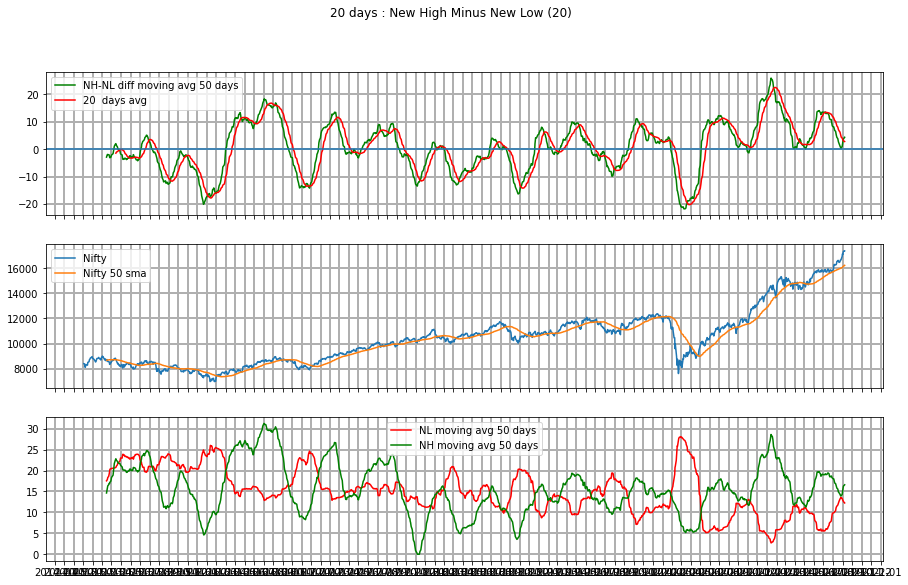

In [139]:
fig, ax = plt.subplots(3,1, figsize=(15,9),sharex=True)
ax[2].plot(downput.loc[:, :].index, downput.loc[:, 'NL'].rolling(window=50).mean(),'r', label='NL moving avg 50 days')
ax[2].plot(output.loc[:, :].index, output.loc[:, 'NH'].rolling(window=50).mean(),'g', label='NH moving avg 50 days')
ax[0].plot(output.loc[:, :].index, output.loc[:, 'final'],'g', label='NH-NL diff moving avg 50 days')
ax[0].plot(output.loc[:, :].index, output.loc[:, 'final'].rolling(window=20).mean(),'r', label='20  days avg')
ax[1].plot(nifty.iloc[:, :].index, nifty.loc[:, 'Close'], label='Nifty')
ax[1].plot(nifty.iloc[:, :].index, nifty.loc[:, 'Close'].rolling(window=50).mean(), label='Nifty 50 sma')
plt.suptitle('20 days : New High Minus New Low (20)')
yloc = YearLocator()
mloc = MonthLocator()
ax[0].xaxis.set_major_locator(mloc)
ax[1].xaxis.set_major_locator(mloc)
ax[2].xaxis.set_major_locator(mloc)
ax[0].grid(linewidth =2)
ax[1].grid(linewidth =2)
ax[2].grid(linewidth =2)
ax[0].legend()
ax[2].legend()
ax[1].legend()
ax[0].axhline(y=0)
plt.show()